## <font color = 'green' id = "section" >Notebook 2: Apprentissage automatique, Regression: Polution CO2</font>

# <font color="blue">Sommaire</font>
1. [Importation des librairies](#section_1)    
2. [Lecture du Dataset](#section_2) 
3. [Approche de modélisation](#section_3)     
    3.1. [Separation de la variable prédictive des explicatives](#section_3_1)    
    3.2. [Separation variables numériques et catégorielles](#section_3_2)   
    3.3. [Création du preprocessor](#section_3_3)    
    3.4. [Séparation données train et test](#section_3_4) 
4. [Prediction de CO2](#section_4)       
    4.1. [Prediction de CO2: DummyRegressor](#section_4_1)    
    4.2. [Prediction de CO2: LinearRegression](#section_4_2)   
    4.3. [Prediction de CO2: SGDRegressor](#section_4_3)    
    4.4. [Prediction de CO2: RandomForestRegressor](#section_4_4)    

# <font color ='red' id = 'section_1' > 1.Importation des librairies </font>

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import ast
import scipy as sp
import time
import pickle
from datetime import datetime
#-------------------------------------------------------------------
from tqdm import tqdm
import gc
#------------------------------------------------------------------
import plotly.graph_objs as go
import plotly.express as px
from textwrap import wrap
#-------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.metrics import *

#-------------------------------------------------
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor, make_column_transformer

#--------------------------------------------------------
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

#--------------------------------------------------------
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

#------------------------------------------------
from xgboost import XGBRegressor

#-----------------------------------------------------------
from sklearn.model_selection import GridSearchCV

In [3]:
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 500)

## Checklist

Depuis 2001, **l’ADEME** acquiert tous les ans ces données auprès de **l’Union Technique de l’Automobile du motocycle et du Cycle UTAC** (en charge de l’homologation des véhicules avant leur mise en vente) en accord avec le ministère du développement durable.
Pour chaque véhicule les données d’origine (transmises par l’Utac) sont les suivantes :

* **Les consommations de carburant**

* **Les émissions de dioxyde de carbone (CO2)**

* **Les émissions des polluants de l’air** (réglementés dans le cadre de la norme Euro)

* **L’ensemble des caractéristiques techniques des véhicules** (gammes, marques, modèles, n° de CNIT, type d’énergie ...)



# L'inventaire des varaibles pertinentes:

Les données comprenent des variables pertinentes suivantes:

* **lib_mrq_utac**: La marque, il y'a 12.

* **lib_mod**: Le modèle commerciale, il y'a 20.

* **cod_cbr**: Le type de carburant, il y a 5.

* **hybride**: Information permettant d’identifier les véhicules hybrides (O/N)

* **puiss_max** : Puissance maximale

* **typ_boite_nb_rapp**: Type boite de vitesse et le nombre de rapport.

* **conso_urb**: Consommation urbaine de carburant (en l/100km),

* **conso_exurb**: consommation extra urbaine de carburant (en l/100km),

* **conso_mixte**: Consommation mixte de carburant (en l/100km),

* **co2**: Emission de CO2 (en g/km),

* **masse_ordma_min**: Masse en ordre de marche mini

* **masse_ordma_max**: Masse en ordre de marche max
 
* **Carrosserie**: Carrosserie

* **gamme**: Gamme du véhicule



# Objectif

Notre objectif majeur dans ce notebook 2 est de :

Prédire les emisisions de **CO2** des vehicules en fonction de certaines informations (Variables explicatives)

* En utilisant 4 à 5 modéles différents

* En comparant  les scores
    
* En choissisant le meilleur modèle


# Description des données

Lien vers les données: https://www.data.gouv.fr/fr/datasets/emissions-de-co2-et-de-polluants-des-vehicules-commercialises-en-france/


# <font color="red" id="section_2"> 2. Chargement, lecture, apercu et infos des données </font>

In [4]:
data_model = pd.read_csv("data_model.csv")

In [5]:
display(data_model.head(2))
display(data_model.tail(2))

,lib_mrq,cnit,cod_cbr,hybride,puiss_max,Carrosserie,gamme,co2,masse_ordma_min,masse_ordma_max,Type_boite,Nb_rapp
0,ALFA-ROMEO,M10ALFVP000G340,ES,non,147,BERLINE,MOY-SUPER,182.0,1505.0,1505.0,M,6.0
1,ALFA-ROMEO,M10ALFVP000H341,ES,non,147,BERLINE,MOY-SUPER,186.0,1555.0,1555.0,M,6.0


,lib_mrq,cnit,cod_cbr,hybride,puiss_max,Carrosserie,gamme,co2,masse_ordma_min,masse_ordma_max,Type_boite,Nb_rapp
55026,VOLVO,M1GVLVVP874Z718,ES,non,224,TS TERRAINS/CHEMINS,SUPERIEURE,139.0,1788.0,1788.0,A,6.0
55027,VOLVO,M10VLVVP8967562,ES,non,225,TS TERRAINS/CHEMINS,SUPERIEURE,248.0,1815.0,1815.0,A,8.0


In [6]:
data_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55028 entries, 0 to 55027
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   lib_mrq          55028 non-null  object 
 1   cnit             55028 non-null  object 
 2   cod_cbr          55028 non-null  object 
 3   hybride          55028 non-null  object 
 4   puiss_max        55028 non-null  object 
 5   Carrosserie      55028 non-null  object 
 6   gamme            55028 non-null  object 
 7   co2              55028 non-null  float64
 8   masse_ordma_min  55028 non-null  float64
 9   masse_ordma_max  55028 non-null  float64
 10  Type_boite       55028 non-null  object 
 11  Nb_rapp          55028 non-null  float64
dtypes: float64(4), object(8)
memory usage: 5.0+ MB


In [7]:
data_model.duplicated().sum()

0

# <font color="red" id="section_3" > 3. Approche modélisation

## <font color="red" id="section_3_1" > 3.1  Separation de la variable prédictive des explicatives

In [8]:
Y = data_model['co2']
X = data_model.drop(['co2'] ,axis =1)

In [9]:
X.shape

(55028, 11)

## <font color="red" id="section_3_2" > 3.2 Separation variables numériques et catégorielles

In [10]:
var_num = X.select_dtypes(include = ['float', 'int']).columns.to_list()
var_num

['masse_ordma_min', 'masse_ordma_max', 'Nb_rapp']

In [11]:
var_cat = X.select_dtypes(include = ['object']).columns.to_list()
var_cat

['lib_mrq',
 'cnit',
 'cod_cbr',
 'hybride',
 'puiss_max',
 'Carrosserie',
 'gamme',
 'Type_boite']

## <font color="red" id="section_3_3" > 3.3  Création du preprocessor
  
 Ici, nous allons normaliser les données numérique avec **StandarScaler** et encoder les catégorielles avec **OneHotEncoder**, le tout dans une pipeline qu'on pourra appeler à chaque fois.

In [12]:
numerical_pipiline = make_pipeline(StandardScaler())
categoriacal_pipiline = make_pipeline(OneHotEncoder(handle_unknown = 'ignore'))
preprocessor = make_column_transformer( 
                          (numerical_pipiline, var_num),
                          (categoriacal_pipiline, var_cat),
                           remainder="passthrough"
                        )
#handle_unknown = 'ignore' permet d'ignorer les catégorielle non lu lors du fit afin d'éviter des erre

## <font color="red" id="section_3_4" > 3.4  Séparation données train et test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state =5)

<Figure size 1080x1080 with 0 Axes>

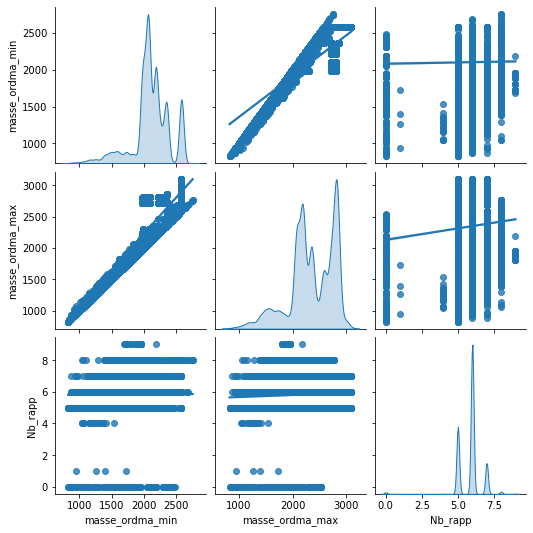

In [14]:
plt.figure(figsize = (15,15))
sns.pairplot(X_train, kind ='reg', diag_kind = 'kde')
plt.show()

In [15]:
X_test.shape

(11006, 11)

## <font color="red" id="section_4" > 4.  Prediction de CO2
    
Pour chacun de nos modèles:
   * **DummyRegressor**,
   * **LinearRegression**, 
   * **SGDRegressor**, 
   * **RandomForestRegressor**,
   * **GradientBoostingRegressor**,
   * **XGBRegressor**, 
    
nous allons predire le niveai d'émission de **Co2** puis établir une comparaison sur la performance des modèles.

## <font color="red" id="section_4_1" > 4.1  Prediction de CO2: DummyRegressor

In [16]:
model_dum = make_pipeline( preprocessor,
                  TransformedTargetRegressor(regressor = DummyRegressor())   
)
model_dum.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['masse_ordma_min',
                                                   'masse_ordma_max',
                                                   'Nb_rapp']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['lib_mrq', 'cnit', 'cod_cbr',
                                                   'hybride', 'puiss_max',
                                                   'Carrosserie', 'gamme',
                                                   'Type_boite'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=DummyRegressor()))])

## <font color="red" id="section_4_1_1" > 4.1.1 Prediction et performance du model

In [17]:
y_pred_dum = model_dum.predict(X_test)

In [18]:
y_pred_dum

array([201.6630094, 201.6630094, 201.6630094, ..., 201.6630094,
       201.6630094, 201.6630094])

### Comparaison: Val réelle vs val predict

In [19]:
pd.DataFrame({'Valeurs réelles': y_test.values.ravel(), 'Valeurs predict': y_pred_dum}).head(6)

,Valeurs réelles,Valeurs predict
0,197.0,201.663009
1,234.0,201.663009
2,162.0,201.663009
3,150.0,201.663009
4,189.0,201.663009
5,149.0,201.663009


### Score de performance

In [20]:
print(f"Le score de performance sur le training set est:", model_dum.score(X_train, y_train))

Le score de performance sur le training set est: 0.0


In [21]:
print("Le score R2 de performance sur le  test set est: {};" .format(np.round(model_dum.score(X_test, y_test), 5)))
print("La mean absolute error (MAE) est :{};".format(np.round(np.round(mean_absolute_error(y_test,y_pred_dum)), 2)))
print("La RMSE est :{};" .format(np.round(np.sqrt(mean_absolute_error(y_test,y_pred_dum)), 3)))
print("La median  absolute error est :{}.".format(np.round(median_absolute_error(y_test,y_pred_dum))))

Le score R2 de performance sur le  test set est: -0.0;
La mean absolute error (MAE) est :22.0;
La RMSE est :4.677;
La median  absolute error est :12.0.


## Visualisation

Text(0.5, 1.0, 'DummyRegressor, prediction de CO2')

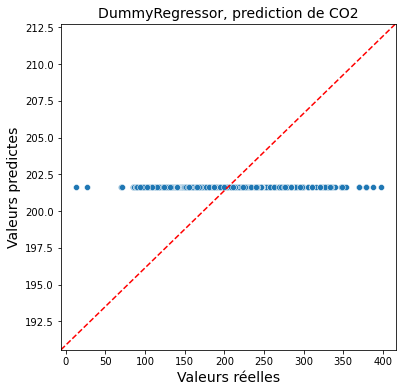

In [22]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = y_test, y = y_pred_dum)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("DummyRegressor, prediction de CO2", fontsize = 14)

# Commentaire: 
Ce qu'on constate c'est ce que ce modéle n'a rien appris sur ce dataset, et c'est complétement normal car dummyRegressor ne tient pas compte des données pour prédire.
On l'a juste utiisé comme moyen de référence.

## <font color="red" id="section_4_2" > 4.2  Prediction de CO2: LinearRegression

## Optimisation des hyperparamètres

In [23]:
t0 = time.time() 
params_lr = {"regressor__fit_intercept": [False, True],# sur False; les données doivent être centrées
             "regressor__normalize": [False, True] # s'il fallait normaliser ou pas  
}
lr_grid_cv = GridSearchCV(TransformedTargetRegressor(regressor = LinearRegression()),
                          param_grid = params_lr,
                          cv = 5,
                          scoring = ('r2',"neg_mean_absolute_error"),
                          refit = "neg_mean_absolute_error",
                          return_train_score =True,
                          n_jobs =-1)

mlr_cv = Pipeline([('preprocessor', preprocessor),
                        ('grid_searchcv_mlr', lr_grid_cv)
    
                  ])

mlr_cv.fit(X_train, y_train)
print("Execution time est:{}".format(time.time() - t0))

Execution time est:58.27159237861633


In [24]:
resultat_mlr = pd.DataFrame.from_dict(mlr_cv.named_steps['grid_searchcv_mlr'].cv_results_)
resultat_mlr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,param_regressor__normalize,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error
0,12.479458,1.639732,0.005201,0.000748,False,False,"{'regressor__fit_intercept': False, 'regressor...",-0.280514,-1.197983,-2.370022,0.733021,-2.910589,-1.205217,1.332438,2,0.999911,0.999979,0.999897,0.999897,0.999914,0.99992,0.00003,-29.020244,-39.857484,-47.118012,-13.436459,-50.553931,-35.997226,13.476926,2,-0.006808,-0.004078,-0.008539,-0.007813,-0.006310,-0.006710,0.001527
1,12.598565,2.018795,0.005206,0.000978,False,True,"{'regressor__fit_intercept': False, 'regressor...",-0.280514,-1.197983,-2.370022,0.733021,-2.910589,-1.205217,1.332438,2,0.999911,0.999979,0.999897,0.999897,0.999914,0.99992,0.00003,-29.020244,-39.857484,-47.118012,-13.436459,-50.553931,-35.997226,13.476926,2,-0.006808,-0.004078,-0.008539,-0.007813,-0.006310,-0.006710,0.001527
2,10.494714,1.357238,0.007201,0.005635,True,False,"{'regressor__fit_intercept': True, 'regressor_...",-0.280180,-1.197574,-2.370031,0.733427,-2.910446,-1.204961,1.332568,1,0.999911,0.999979,0.999897,0.999897,0.999914,0.99992,0.00003,-29.018708,-39.850649,-47.117014,-13.429828,-50.552661,-35.993772,13.478474,1,-0.006808,-0.004078,-0.008538,-0.007813,-0.006310,-0.006709,0.001527
3,0.862967,0.128188,0.004804,0.000748,True,True,"{'regressor__fit_intercept': True, 'regressor_...",-105.360886,-1.579334,-4.772769,-672.092826,-5.688615,-157.898886,260.079613,4,0.999911,0.999979,0.999897,0.999900,0.999914,0.99992,0.00003,-266.671230,-43.138511,-62.656681,-684.248770,-66.774309,-224.697900,243.766196,4,-0.006707,-0.004078,-0.008538,-0.007335,-0.006309,-0.006593,0.001466


## Commentaire:
Nous allons à présent extraire les information pertinentes nous concernant dans cette sous section.

In [25]:
best_nmae = np.round(mlr_cv.named_steps['grid_searchcv_mlr'].best_score_,3)
best_score_R2 = np.round(np.mean(resultat_mlr[resultat_mlr['rank_test_r2']==1]['mean_test_r2']), 3)
best_params = mlr_cv.named_steps['grid_searchcv_mlr'].best_params_
best_fit_time_training = np.round(np.mean(resultat_mlr["mean_fit_time"])*X_train.shape[0], 2)
print("Le meilleur score NMAE: {};\nMeilleur score R2: {};\nMeilleurt trainin time: {}s; \nMeilleurs paramètres: {}."\
      .format(best_nmae, best_score_R2 , best_fit_time_training, best_params))

Le meilleur score NMAE: -35.994;
Meilleur score R2: -1.205;
Meilleurt trainin time: 400993.14s; 
Meilleurs paramètres: {'regressor__fit_intercept': True, 'regressor__normalize': False}.


In [27]:
model_lr = make_pipeline( preprocessor,
                  TransformedTargetRegressor(regressor = LinearRegression(fit_intercept =True,
                                                                          normalize =False))   
)
model_lr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['masse_ordma_min',
                                                   'masse_ordma_max',
                                                   'Nb_rapp']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['lib_mrq', 'cnit', 'cod_cbr',
                                                   'hybride', 'puiss_max',
                                                   'Carrosserie', 'gamme',
                                                   'Type_boite'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=LinearRegression(normalize=False)))])

## <font color="red" id="section_4_2_1" > 4.2.1 Prediction et performance du model

In [28]:
y_pred_lr = model_lr.predict(X_test)

In [29]:
y_pred_lr

array([ 85.36223684, 216.67073379, 149.6554401 , ...,  91.7175036 ,
       201.16782867, 227.5574614 ])

### Comparaison: Val réelle vs val predict

In [30]:
pd.DataFrame({'Valeurs réelles': y_test.values.ravel(), 'Valeurs predict': y_pred_lr}).head(6)

,Valeurs réelles,Valeurs predict
0,197.0,85.362237
1,234.0,216.670734
2,162.0,149.655440
3,150.0,155.022601
4,189.0,114.914411
5,149.0,124.052952


### Score de performance

In [31]:
print(f"Le score de performance sur le training set est:", model_lr.score(X_train, y_train))

Le score de performance sur le training set est: 0.9998995348004273


In [32]:
print("Le score R2 de performance sur le  test set est: {};" .format(np.round(model_lr.score(X_test, y_test), 5)))
print("La mean absolute error (MAE) est :{};".format(np.round(np.round(mean_absolute_error(y_test,y_pred_lr)), 2)))
print("La RMSE est :{};" .format(np.round(np.sqrt(mean_absolute_error(y_test,y_pred_lr)), 3)))
print("La median  absolute error est :{}.".format(np.round(median_absolute_error(y_test,y_pred_lr))))

Le score R2 de performance sur le  test set est: -3.01192;
La mean absolute error (MAE) est :50.0;
La RMSE est :7.054;
La median  absolute error est :38.0.


## <font color="red" id="section_4_2_2" > 4.2.2 Visualisation

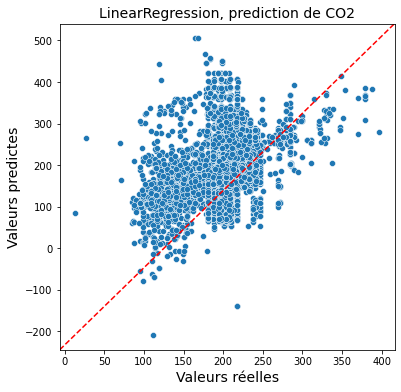

In [33]:
fig, ax = plt.subplots(figsize = (6,6))
sns.scatterplot(x = y_test, y = y_pred_lr)
ax.plot([0,1], [0,1], ls ='--', c = 'red', transform = ax.transAxes)
plt.xlabel("Valeurs réelles", fontsize = 14)
plt.ylabel("Valeurs predictes", fontsize = 14)
ax.set_title("LinearRegression, prediction de CO2", fontsize = 14)
plt.show()

# Commentaire: 
Ce qu'on constate c'est ce que ce modéle ne s'adapte pas à ce jeux de données.

## <font color="red" id="section_4_3" > 4.3  Prediction de CO2: SGDRegressor
  
SGD signifie **Stochastic Gradient Descent** : le gradient de la perte est estimé pour chaque échantillon à la fois et le modèle est mis à jour en cours de route avec un calendrier de force décroissant (c'est-à-dire le taux d'apprentissage).
    
Lien documentation = https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

## Optimisation des hyperparamètres

In [34]:
t0 = time.time()
params_sgdr = {'regressor__penalty': ['l1', 'l2'] ,
              'regressor__alpha':  np.linspace(0, 0.0002, 3) ,
              'regressor__epsilon': np.linspace(0, 0.2, 3)
}
grid_sgdr = GridSearchCV( TransformedTargetRegressor(regressor = SGDRegressor()),
                         param_grid =params_sgdr,
                         cv =5,
                         scoring = ("r2", "neg_mean_absolute_error"),
                         refit = 'neg_mean_absolute_error',
                         return_train_score = True,
                         verbose = 0,
                         n_jobs =-1
                        )
mdgd_cv = Pipeline([('preprocessor', preprocessor),
                  ('grid_search_msgdr',grid_sgdr )
                   ])
mdgd_cv.fit(X_train, y_train)
print("Le temps d'éxécution de la tache est: {}" .format(time.time() - t0))

Le temps d'éxécution de la tache est: 692.6225004196167


## Affichage des resultats d'optimisation

In [35]:
def opt_result(pipeline, model_grid):
    df_resultats = pd.DataFrame.from_dict(pipeline.named_steps[model_grid].cv_results_).\
    sort_values('rank_test_neg_mean_absolute_error')
    best_nmae = np.round(np.mean(df_resultats["mean_test_neg_mean_absolute_error"]), 2)
    best_score_R2 = np.round(np.mean(df_resultats[df_resultats.rank_test_r2 ==1]['mean_test_r2']), 4)
    best_time_training = np.round(np.mean(df_resultats['mean_fit_time']*X_train.shape[0]), 2)
    best_params = pipeline.named_steps[model_grid].best_params_
    print("Le meilleur score Nmae est:{};\n Meileur score R2: {} \n Le temps de fit moyen: {}; \nMeilleurs paramètres :{}"\
          .format(best_nmae, best_score_R2, best_time_training, best_params))
    return df_resultats

In [36]:
df_results_msdgr = opt_result(mdgd_cv,'grid_search_msgdr' )
df_results_msdgr.head(3)

Le meilleur score Nmae est:-10.58;
 Meileur score R2: 0.7925 
 Le temps de fit moyen: 1292688.39; 
Meilleurs paramètres :{'regressor__alpha': 0.0002, 'regressor__epsilon': 0.1, 'regressor__penalty': 'l1'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__alpha,param_regressor__epsilon,param_regressor__penalty,params,split0_test_r2,split1_test_r2,split2_test_r2,split3_test_r2,split4_test_r2,mean_test_r2,std_test_r2,rank_test_r2,split0_train_r2,split1_train_r2,split2_train_r2,split3_train_r2,split4_train_r2,mean_train_r2,std_train_r2,split0_test_neg_mean_absolute_error,split1_test_neg_mean_absolute_error,split2_test_neg_mean_absolute_error,split3_test_neg_mean_absolute_error,split4_test_neg_mean_absolute_error,mean_test_neg_mean_absolute_error,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_train_neg_mean_absolute_error,split1_train_neg_mean_absolute_error,split2_train_neg_mean_absolute_error,split3_train_neg_mean_absolute_error,split4_train_neg_mean_absolute_error,mean_train_neg_mean_absolute_error,std_train_neg_mean_absolute_error
14,30.414728,1.356249,0.004000,0.001789,0.0002,0.1,l1,"{'regressor__alpha': 0.0002, 'regressor__epsil...",0.796729,0.781817,0.782936,0.808165,0.790830,0.792095,0.009704,10,0.847575,0.848469,0.850272,0.844460,0.847256,0.847606,0.001891,-10.492142,-10.533586,-10.637760,-10.427117,-10.437136,-10.505548,0.076521,1,-9.518494,-9.488773,-9.474417,-9.554970,-9.541565,-9.515644,0.030490
6,37.033067,2.345906,0.003400,0.000490,0.0001,0.0,l1,"{'regressor__alpha': 0.0001, 'regressor__epsil...",0.797108,0.782117,0.782536,0.808196,0.791099,0.792211,0.009760,8,0.855688,0.856596,0.858349,0.852708,0.855374,0.855743,0.001837,-10.507733,-10.550444,-10.657191,-10.418246,-10.408484,-10.508419,0.091671,2,-9.175460,-9.149547,-9.127508,-9.185343,-9.163554,-9.160283,0.020291
8,44.596077,1.294184,0.007802,0.008110,0.0001,0.1,l1,"{'regressor__alpha': 0.0001, 'regressor__epsil...",0.796564,0.782118,0.783244,0.808361,0.791108,0.792279,0.009625,7,0.855748,0.856620,0.858374,0.852680,0.855343,0.855753,0.001857,-10.509802,-10.538337,-10.650965,-10.426140,-10.423714,-10.509792,0.083847,3,-9.174669,-9.139335,-9.135173,-9.196384,-9.173118,-9.163736,0.023172


## Prediction

In [37]:
model_sgr = make_pipeline(preprocessor, TransformedTargetRegressor(regressor = SGDRegressor(alpha = 0.0002,
                                                                epsilon = 0.2, penalty ='l1', random_state =5))
    
)
model_sgr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['masse_ordma_min',
                                                   'masse_ordma_max',
                                                   'Nb_rapp']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['lib_mrq', 'cnit', 'cod_cbr',
                                                   'hybride', 'puiss_max',
                                                   'Carrosserie', 'gamme',
                                                   'Type_boite'])])),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=SGDRegressor(alpha=0.0002,
                                                                   epsilon=0.2,
                                                                   penalty='l1',
                                                                   random_state=5)))])

In [38]:
y_pred_sgdr = model_sgr.predict(X_test)

## Comparaison valeur réelles et valeurs predictes

In [39]:
pd.DataFrame.from_dict({'Valeurs réelles': y_test.values.ravel(), "Valeurs predictes": y_pred_sgdr}).head()

,Valeurs réelles,Valeurs predictes
0,197.0,202.045828
1,234.0,211.820409
2,162.0,158.410110
3,150.0,152.480316
4,189.0,201.307025


## Estimation des erreurs

In [40]:
def estimattion_erreur(y_pred):
    print("Le score R2 de performance sur le training set est: {};" .format(np.round(model_sgr.score(X_train, y_train), 5)))
    print("Le score R2 de performance sur le  test set est: {};" .format(np.round(model_sgr.score(X_test, y_test), 5)))
    print("La mean absolute error (MAE) est :{};".format(np.round(np.round(mean_absolute_error(y_test,y_pred)), 2)))
    print("La RMSE est :{};" .format(np.round(np.sqrt(mean_absolute_error(y_test,y_pred)), 3)))
    print("La median  absolute error est :{}.".format(np.round(median_absolute_error(y_test,y_pred))))

In [41]:
estimattion_erreur(y_pred_sgdr)

Le score R2 de performance sur le training set est: 0.84249;
Le score R2 de performance sur le  test set est: 0.79539;
La mean absolute error (MAE) est :10.0;
La RMSE est :3.228;
La median  absolute error est :8.0.


## Visualisation 

In [42]:
def visualisation(y_pred, model):
    fig, ax = plt.subplots( figsize = (12,6))
    sns.scatterplot( x = y_test, y = y_pred)
    ax.plot([0,1], [0,1], ls ='--', c ='red', transform = ax.transAxes)
    plt.ylabel("Valeurs predictes", fontsize = 14)
    plt.xlabel("Valeurs réélles", fontsize = 14)
    ax.set_title("Prediction de CO2 par {}".format(model), fontsize = 16)
    plt.show()

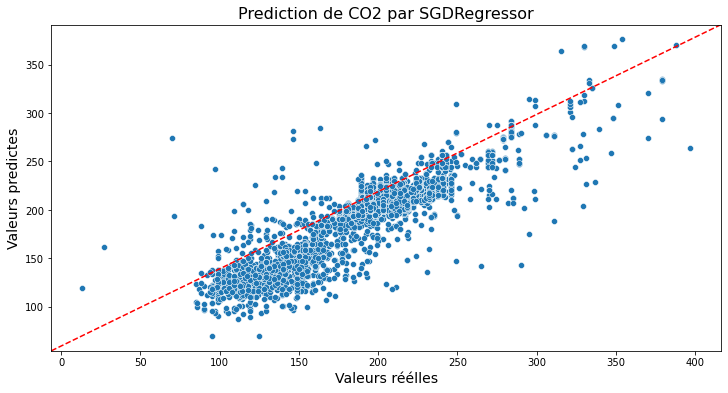

In [43]:
visualisation(y_pred_sgdr, 'SGDRegressor')

# Commentaire:
Au regard des valeurs du score **R2**, des **RMSE** et de la **visualisation graphique**, on se rend-compte que notre modèle s'est adapté à ce jeu de données avec presque **80%** de chance de prédire la bonne valeurset ce  avec des erreurs moins importantes.